# Main Code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

class LogisticRegressionOvR:
  def __init__(self,learning_rate=0.01,epochs=10000,regularization_strength = 0.1):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.regularization_strength = regularization_strength
    self.weights = None

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def add_bias(self,X):
    return np.insert(X,0,1,axis=1)

  def fit(self,X,y):
    X = self.add_bias(X)
    classes = np.unique(y)
    num_classes = len(classes) #3
    self.weights = np.zeros((num_classes,X.shape[1]))
    # Weights is a 2D array the row is the class_problem is amount of flower type
    # Column is the amount of features, example color,size,shape,pedicel

    for i in range(num_classes): #num_classes is len(classes)
      binary_labels = (y== classes[i].astype(int))
      # Example classes is ["a","b","sunflower","rose"]
      # y is ["a","a","sunflower","rose","b","sunflower","rose"]
      # when i is 0 => classes[0] = "a"
      # So binary_label = [1,1,0,0,0,0,0] like One-vs-rest only "a" is 1
      self.train_one_vs_rest(X,binary_labels,i)

  def train_one_vs_rest(self,X,y,class_index):
    for epoch in range(self.epochs):
      logits = np.dot(X,self.weights[class_index])
      # example i = 0 so the line computes the vectorized dot product
      # between the input features(X) and the weights[0] corresponding to the first class
      predictions = self.sigmoid(logits)

      error = predictions - y
      gradient = np.dot(X.T,error)/len(y)

      regularization_term = (self.regularization_strength/len(y)) * self.weights[class_index]
      regularization_term[0] = 0 #No regularization for bias term

      self.weights[class_index] -= self.learning_rate*(gradient + regularization_term)

  def predict(self,X) :
    X = self.add_bias(X)
    logits = np.dot(X,self.weights.T)
    probabilities = self.sigmoid(logits)
    predicted_classes = np.argmax(probabilities,axis =1)
    return predicted_classes

In [ ]:
import pandas as pd

data = pd.read_csv("iris_data.csv")

X = data.iloc[:,:-1].values
y, _ = pd.factorize(data['Species'])


# Split the dataset into 80% training and 20% testing, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the logistic regression model
model = LogisticRegressionOvR(learning_rate=0.005, epochs=10000, regularization_strength=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model
print("Predicted:\n", predictions)
print("Target:\n", y_test)
print(metrics.classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

Predicted:
 [0 2 1 1 0 1 0 0 2 2 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Target:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


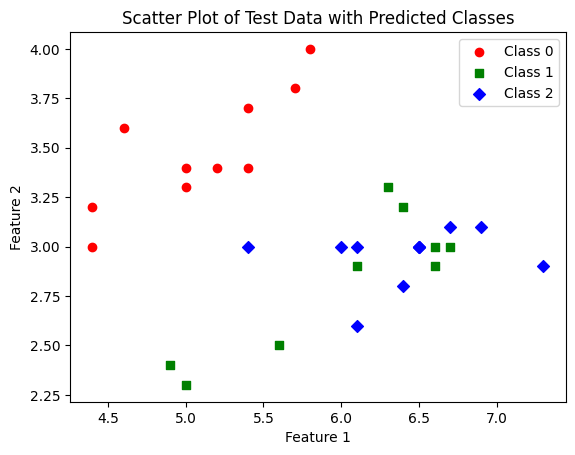

In [ ]:
# Scatter plot
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for i in range(len(np.unique(predictions))):
    plt.scatter(X_test[predictions == i, 0], X_test[predictions == i, 1], color=colors[i], marker=markers[i], label=f'Class {i}')

plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


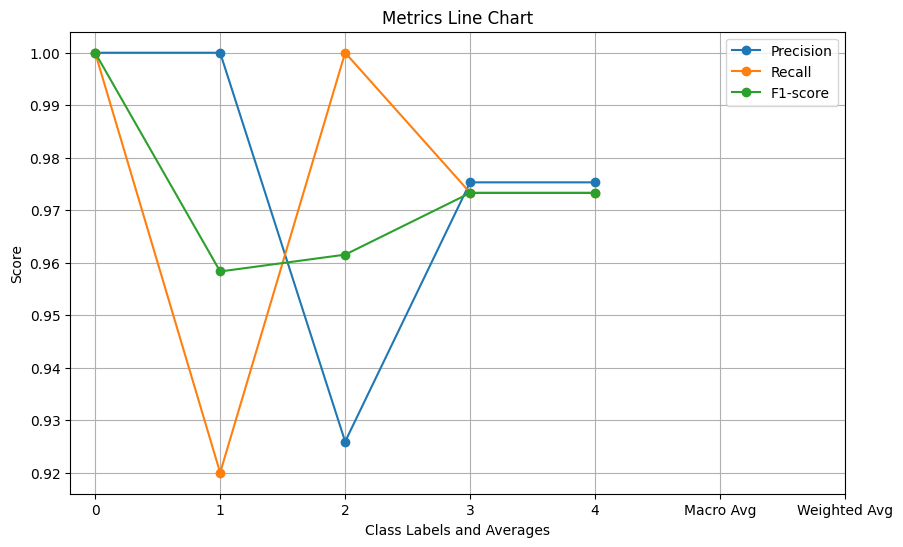

In [ ]:
model = LogisticRegressionOvR(learning_rate=0.005, epochs=10000, regularization_strength=0.1)
model.fit(X, y)

# Make predictions on the dataset
predictions = model.predict(X)

# Get classification report
classification_rep = metrics.classification_report(y, predictions, output_dict=True)

# Extract metrics
precision = [classification_rep[label]['precision'] for label in classification_rep if label.isdigit()]
recall = [classification_rep[label]['recall'] for label in classification_rep if label.isdigit()]
f1_score = [classification_rep[label]['f1-score'] for label in classification_rep if label.isdigit()]

# Append macro and weighted averages
precision.append(classification_rep['macro avg']['precision'])
recall.append(classification_rep['macro avg']['recall'])
f1_score.append(classification_rep['macro avg']['f1-score'])

precision.append(classification_rep['weighted avg']['precision'])
recall.append(classification_rep['weighted avg']['recall'])
f1_score.append(classification_rep['weighted avg']['f1-score'])

# Create Line Chart
labels = [str(i) for i in range(len(precision))]
metrics_names = ['Precision', 'Recall', 'F1-score']

plt.figure(figsize=(10, 6))

for i, metric in enumerate([precision, recall, f1_score]):
    plt.plot(metric, label=metrics_names[i], marker='o')

# Update this line for the correct xticks
plt.xticks(range(len(labels) + 2), labels + ['Macro Avg', 'Weighted Avg'])

plt.title('Metrics Line Chart')
plt.xlabel('Class Labels and Averages')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from numpy.ma import count
import pandas as pd

# Load the dataset
data = pd.read_csv("iris_extended.csv")

# Selecting only the columns: sepal_length, sepal_width, petal_length, petal_width
X_test = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test = data[['species']].values
# Display the first few rows of the selected columns
print(count(y_test))
result = model.predict(X_test)
print("Model predict:\n",result)
print("Target:\n",y)


# Some example about syntax

In [ ]:
#np.insert
import numpy as np

X = np.array([[2,3],
              [4,5],
              [6,7]])

X_modified = np.insert(X,0,1,axis=1)
print(X_modified)

In [ ]:
#np.zeros
import numpy as np
weight = np.zeros((2,3))
print(weight)

In [ ]:
#np.unique
import numpy as np

y = np.array([3,1,2,3,2,1,4,5,4])

unique_values = np.unique(y)

print("Origin array: ",y)
print("Unique value: ",unique_values)

In [ ]:
#np.
import numpy as np
a = ["a","sunflower","rose","rose","dog","cat","buffalo"]
b = np.unique(a)
print(b)
for i in range(len(b)):
  binary_labels = (b==a[i]).astype(int)
  print(binary_labels)
